# Import libraries

In [1]:
"""
from IPython.display import clear_output
!pip install 'qiskit[nature]'
!pip install qiskit[visualization]
!pip install qiskit-machine-learning
!pip install pylatexenc
clear_output()
"""

"\nfrom IPython.display import clear_output\n!pip install 'qiskit[nature]'\n!pip install qiskit[visualization]\n!pip install qiskit-machine-learning\n!pip install pylatexenc\nclear_output()\n"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.datasets import load_iris
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import classification_report, confusion_matrix

# EDA 
### Reading the Data.

In [3]:
df_train = pd.read_csv("./pulsar_data/pulsar_data_train.csv")

df_test = pd.read_csv("./pulsar_data/pulsar_data_test.csv")

In [4]:
df_train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [5]:
df_test.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


* as we can see the target is NAN in the test df so it will be predected.
* we can change the name of columns to simplify.

In [6]:
df_train.columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr',
               'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target']
df_test.columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr',
               'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target']

### Data informations and describtion

In [7]:
df_train['target'].value_counts()

0.0    11375
1.0     1153
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

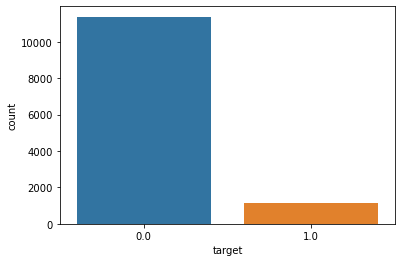

In [8]:
sns.countplot(df_train.target)

# Data preprocessing

### Dealing with missing data

In [9]:
df_train.isnull().sum()

mean_profile           0
std_profile            0
kurtosis_profile    1735
skewness_profile       0
mean_dmsnr             0
std_dmsnr           1178
kurtosis_dmsnr         0
skewness_dmsnr       625
target                 0
dtype: int64

In [10]:
df_train_copy = df_train.copy()

In [11]:
fill_list = df_train['kurtosis_profile']
df_train['kurtosis_profile'] = df_train['kurtosis_profile'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_train.index))))
fill_list = df_train['std_dmsnr']
df_train['std_dmsnr'] = df_train['std_dmsnr'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_train.index))))
fill_list = df_train['skewness_dmsnr']
df_train['skewness_dmsnr'] = df_train['skewness_dmsnr'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_train.index))))

In [12]:
df_train.isnull().sum()

mean_profile          0
std_profile           0
kurtosis_profile    227
skewness_profile      0
mean_dmsnr            0
std_dmsnr            93
kurtosis_dmsnr        0
skewness_dmsnr       32
target                0
dtype: int64

In [13]:
df_train.dropna(inplace=True)

In [14]:
df_train.isnull().sum()

mean_profile        0
std_profile         0
kurtosis_profile    0
skewness_profile    0
mean_dmsnr          0
std_dmsnr           0
kurtosis_dmsnr      0
skewness_dmsnr      0
target              0
dtype: int64

In [15]:
df_train.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
count,12178.000000,12178.000000,12178.000000,12178.000000,12178.000000,12178.000000,12178.000000,12178.000000,12178.000000
mean,111.042773,46.524066,0.474125,1.779597,12.716495,26.327286,8.334956,105.618249,0.092215
std,25.714860,6.800527,1.055719,6.216014,29.689885,19.592032,4.550856,107.608300,0.289342
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.789062,42.376018,0.024913,-0.186722,1.908027,14.408116,5.790591,34.981860,0.000000
50%,115.132812,46.922871,0.223180,0.205012,2.794314,18.409978,8.445719,83.097824,0.000000
75%,127.156250,50.963185,0.471933,0.933865,5.447115,28.317409,10.731920,139.984107,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [16]:
df_train_copy.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


We can see that the mean and standard deviation values in the treated dataframe is close to the values in original dataframe. So we can consider this method for missing value treatment.

### Dealing with Duplicate

In [17]:
df_train.duplicated().sum()

0

there is no duplicated data

### Dealing with Outliers

mean_profile           AxesSubplot(0.125,0.657941;0.227941x0.222059)
std_profile         AxesSubplot(0.398529,0.657941;0.227941x0.222059)
kurtosis_profile    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
skewness_profile       AxesSubplot(0.125,0.391471;0.227941x0.222059)
mean_dmsnr          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
std_dmsnr           AxesSubplot(0.672059,0.391471;0.227941x0.222059)
kurtosis_dmsnr            AxesSubplot(0.125,0.125;0.227941x0.222059)
skewness_dmsnr         AxesSubplot(0.398529,0.125;0.227941x0.222059)
target                 AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

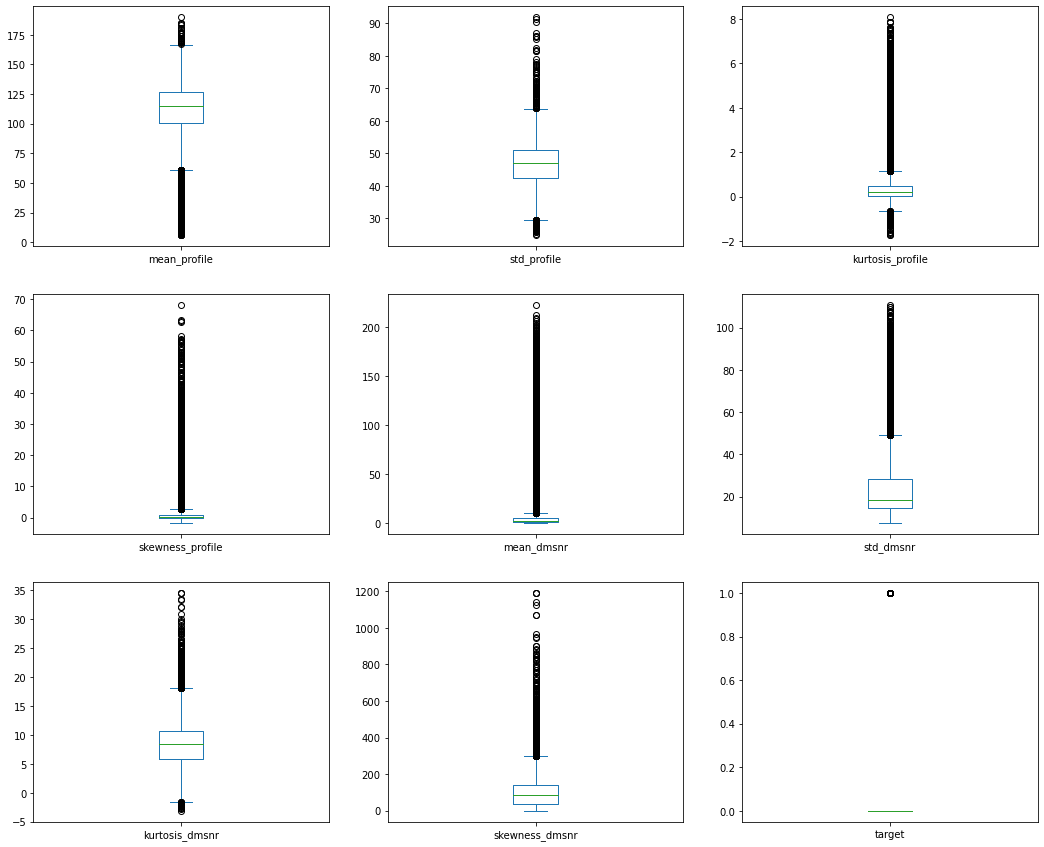

In [18]:
df_train.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,3))

In [19]:
df_train_outl = df_train.copy()
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df_train_outl.loc[:,:'skewness_dmsnr'].columns:
    if 1==1:
        lr,ur=remove_outlier(df_train_outl[column])
        df_train_outl[column]=np.where(df_train_outl[column]>ur,ur,df_train_outl[column])
        df_train_outl[column]=np.where(df_train_outl[column]<lr,lr,df_train_outl[column])

<AxesSubplot:title={'center':'Without Outliers'}>

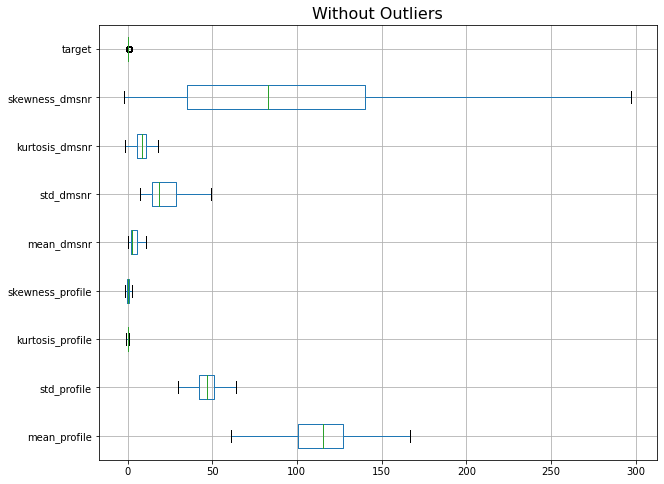

In [20]:
plt.figure(figsize=(10,8))
plt.title('Without Outliers',fontsize=16)
df_train_outl.boxplot(vert=0)

In [21]:
df_train_outl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12178 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_profile      12178 non-null  float64
 1   std_profile       12178 non-null  float64
 2   kurtosis_profile  12178 non-null  float64
 3   skewness_profile  12178 non-null  float64
 4   mean_dmsnr        12178 non-null  float64
 5   std_dmsnr         12178 non-null  float64
 6   kurtosis_dmsnr    12178 non-null  float64
 7   skewness_dmsnr    12178 non-null  float64
 8   target            12178 non-null  float64
dtypes: float64(9)
memory usage: 951.4 KB


# Modeling

### Split the data

In [22]:
X = df_train_outl.drop('target',axis=1)
y = df_train_outl[['target']]
X_train, X_test, labels_train, labels_test = train_test_split(X, y, test_size=.30, random_state=1)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(8524, 8)
(3654, 8)
(8524, 1)
(3654, 1)


In [24]:
# Scaling the data
ss=StandardScaler() 
X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [25]:
X_trains.shape

(8524, 8)

In [26]:
def excel_export(report_dict,best_params,sheet_name,writer):
  df = pd.DataFrame(report_dict).transpose()
  df_mejor_valores = pd.DataFrame.from_dict(best_params, orient='index', columns=['Valor']).T
  df_final = pd.concat([df, df_mejor_valores], axis=1,ignore_index=False, keys=[str(best_params)])
  df_final.to_excel(writer, sheet_name=sheet_name)

In [27]:
"""
X_trains = X_trains[:100, :]
X_tests = X_tests[:100, :]

labels_train = labels_train[:100]
labels_test = labels_test[:100]

labels_train.shape
"""

'\nX_trains = X_trains[:100, :]\nX_tests = X_tests[:100, :]\n\nlabels_train = labels_train[:100]\nlabels_test = labels_test[:100]\n\nlabels_train.shape\n'

## Bulid the model

In [28]:
#GridSearch Parameters
C = [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
kernel = ['linear', 'rbf']
gamma = [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
param_grid = {'C': C,
               'kernel': kernel,
               'gamma': gamma,
             }

SVM_param_grid = {'C': [0.01,0.1, 1, 10],  
              'gamma': [0.09, 0.1, 0.2, 0.001], 
              'kernel': ['rbf', 'linear'],
              'tol':[0.001,0.0001],
              'degree':[2,3]}

writer = pd.ExcelWriter('resultados_classic.xlsx', engine='xlsxwriter')
SVC_Model = SVC()
rf_RandomGrid = RandomizedSearchCV(estimator = SVC_Model, param_distributions = SVM_param_grid, cv = 10, verbose=2, n_jobs = 4,n_iter=10)
rf_RandomGrid.fit(X_trains, labels_train)
best_params = rf_RandomGrid.best_params_
best_estimator = rf_RandomGrid.best_estimator_
y_predict_classical = best_estimator.predict(X_tests)
metric_report_classical =  classification_report(labels_test, y_predict_classical)
report_dict = classification_report(labels_test, y_predict_classical, output_dict=True)
excel_export(report_dict=report_dict,best_params=best_params, sheet_name="Hoja1",writer=writer)
writer.save()

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [29]:
# Qiskit Imports
from qiskit import Aer
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit.utils import QuantumInstance

In [30]:
quantum_instance = QuantumInstance(Aer.get_backend('statevector_simulator'))

In [31]:
def new_feature_map(feature_dimension, repeats = 1):
  """
  Feature function that encoding the classical data to quantum states
  This function is to use with the qiskit functions
  Args:
      repeats (int): Number of repetitions of the quantum circuit
  Returns:
      The qiskit circuit
  """
  qubits = feature_dimension #Number of features (columns) of the training data

  x = ParameterVector('x', length=qubits)
  var_custom = QuantumCircuit(qubits)

  for _ in range(repeats):
      for i in range(qubits):
          var_custom.rx(x[i], i)
      for i in range(qubits):
          for j in range(i + 1, qubits):
              var_custom.cx(i, j)
              var_custom.p(x[i] * x[j], j)
              var_custom.cx(i, j)
      var_custom.barrier()
            
  return var_custom

In [32]:
#GridSearch Parameters
C = [0.1, 0.8, 0.9, 1, 1.2, 1.3, 1.4]
gamma = [0.01, 0.9, 1, 1.2, 1.4, 1.5]
param_grid = {'C': C,
               'gamma': gamma,
             }

writer = pd.ExcelWriter('resultados_quantum.xlsx', engine='xlsxwriter')
numero_de_componentes = X_trains.shape[1]

feature_maps = [
  ZZFeatureMap(feature_dimension=numero_de_componentes, reps=2),
  ZFeatureMap(feature_dimension=numero_de_componentes, reps=2),
  new_feature_map(feature_dimension=numero_de_componentes, repeats = 1)
]
SVC_Model = SVC(kernel='precomputed')
for feature_map in feature_maps:
  # Calcular la matriz de kernel cuántico
  custom_kernel_v1 = QuantumKernel(feature_map=feature_map, quantum_instance=quantum_instance)
  kernel_train = custom_kernel_v1.evaluate(x_vec=X_trains)
  kernel_test = custom_kernel_v1.evaluate(x_vec=X_tests, y_vec=X_trains)
  # Realizar la búsqueda de cuadrícula
  rf_RandomGrid = RandomizedSearchCV(estimator = SVC_Model, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = 4,n_iter=10)
  rf_RandomGrid.fit(kernel_train, labels_train)
  best_params = rf_RandomGrid.best_params_
  best_estimator = rf_RandomGrid.best_estimator_
  y_predict_classical = best_estimator.predict(kernel_test)
  metric_report_classical =  classification_report(labels_test, y_predict_classical)
  report_dict = classification_report(labels_test, y_predict_classical, output_dict=True)
  excel_export(report_dict=report_dict,best_params=best_params, sheet_name="{}".format(type(feature_map).__name__),writer=writer)
writer.save()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
